In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\BiPiN\Desktop\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


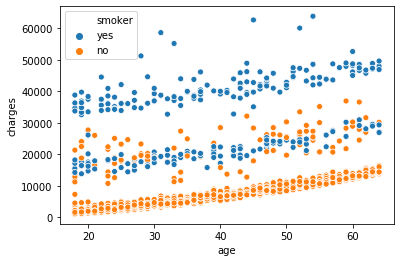

In [10]:
sns.scatterplot("age","charges",hue='smoker',data=df)

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [65]:
df.children.value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [69]:
df.children.unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

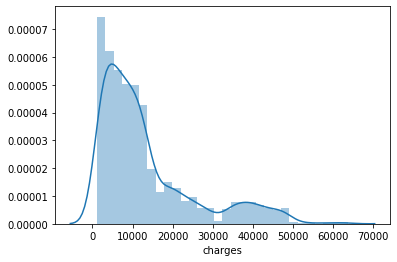

In [55]:
sns.distplot(df["charges"])

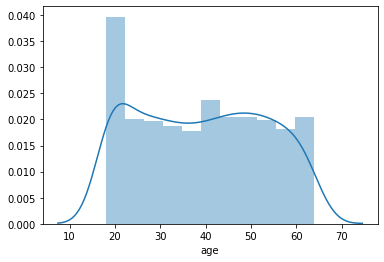

In [56]:
sns.distplot(df["age"])

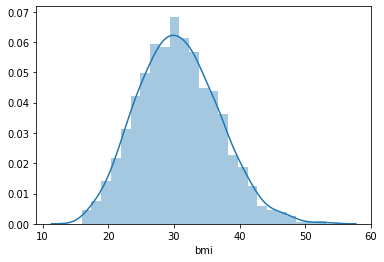

In [57]:
sns.distplot(df["bmi"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


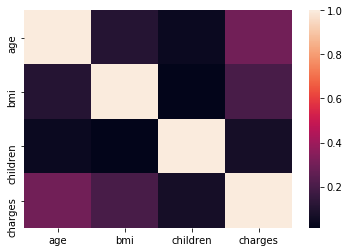

In [8]:
sns.heatmap(df.corr())

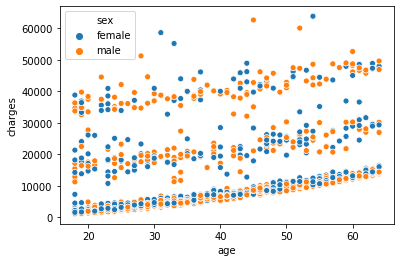

In [61]:
sns.scatterplot("age","charges",hue='sex',data=df)

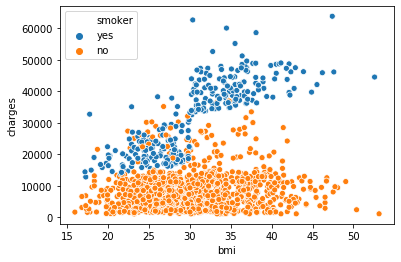

In [14]:
sns.scatterplot("bmi","charges",hue='smoker',data=df)

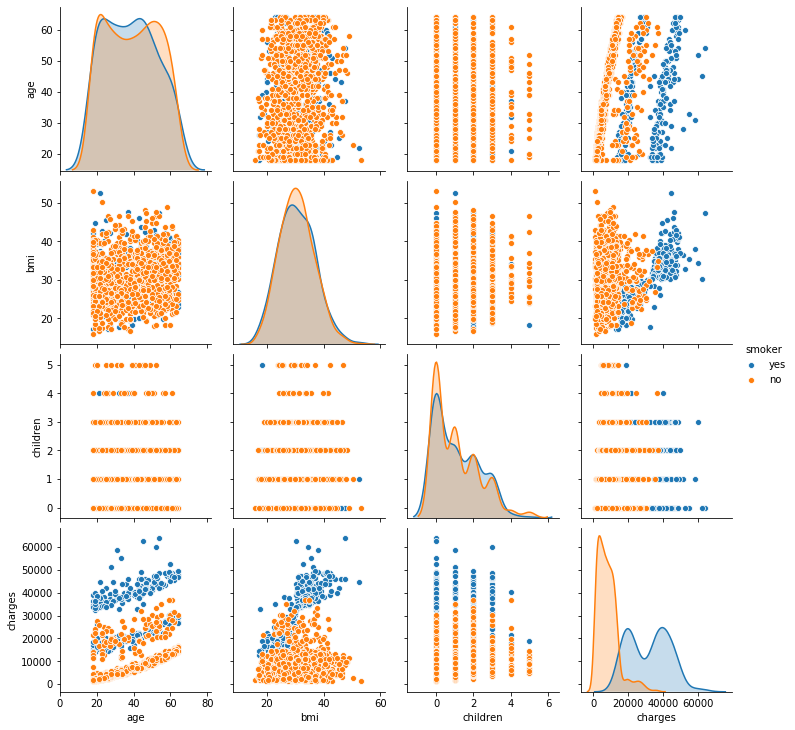

In [16]:
sns.pairplot(df,hue='smoker')

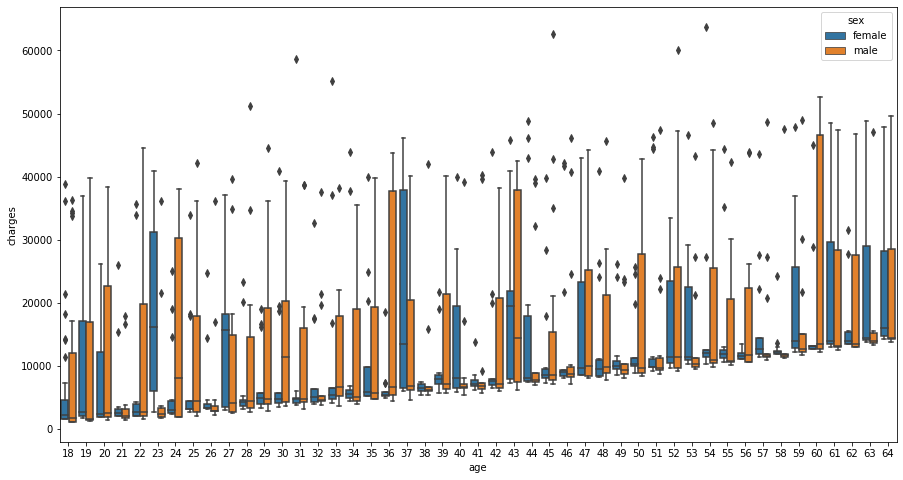

In [28]:
plt.figure(figsize=(15,8))
sns.boxplot(x='age',y='charges',hue='sex',data=df)


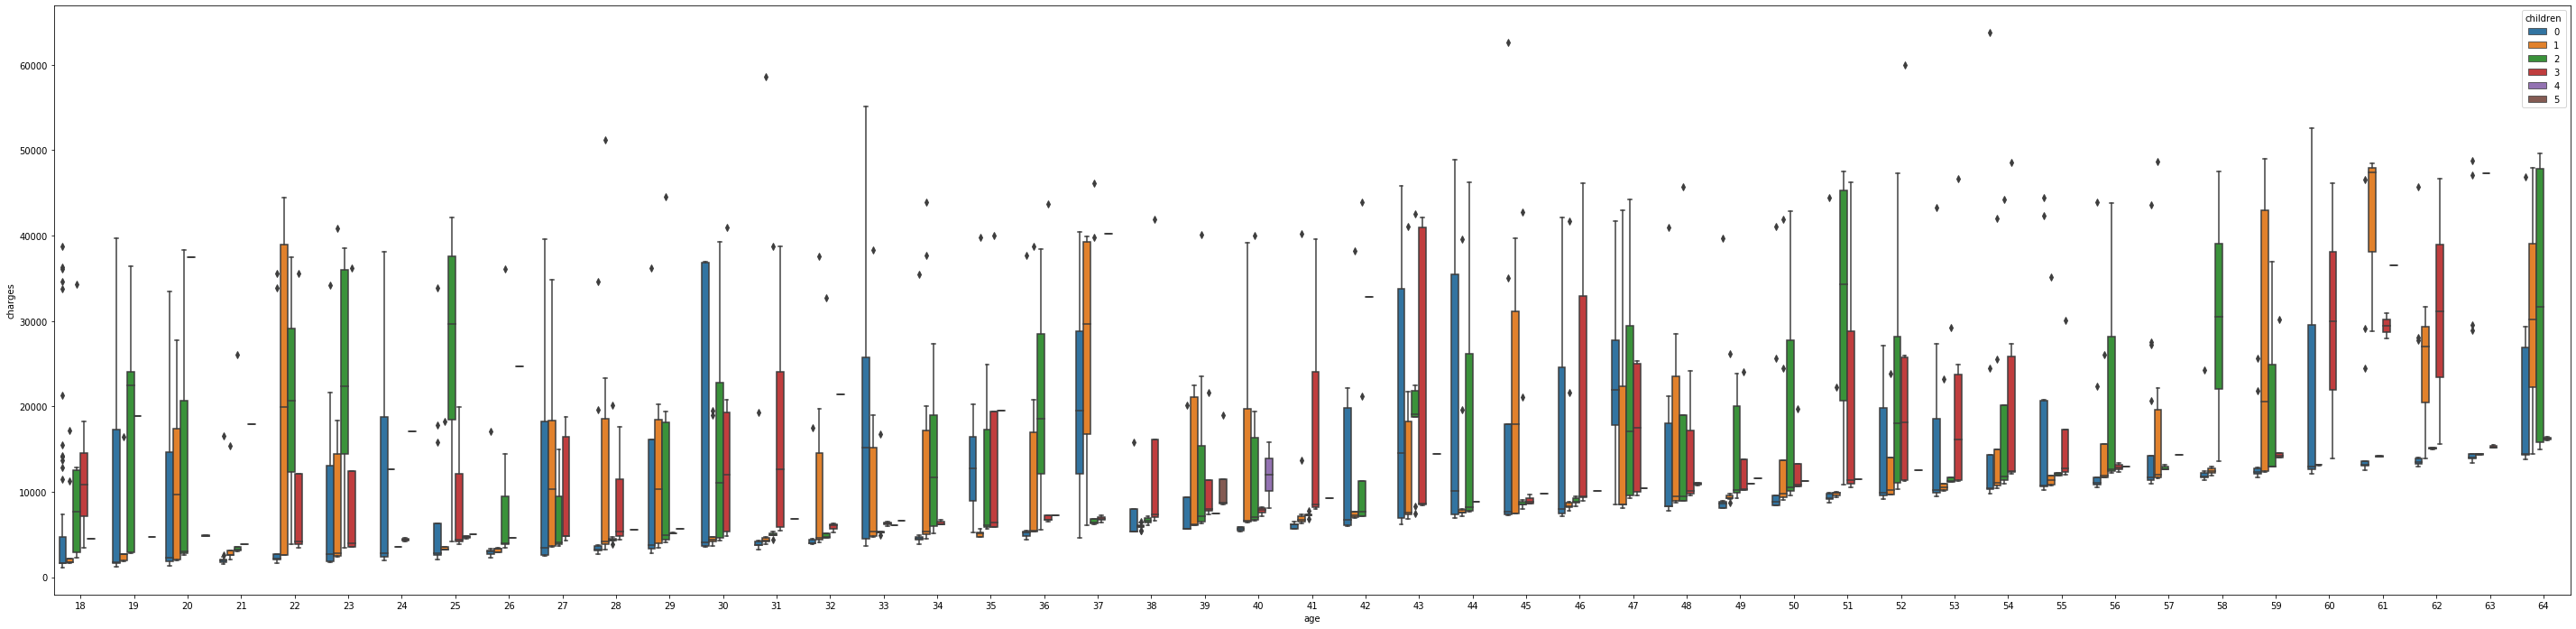

In [73]:
plt.figure(figsize=(50,12))
sns.boxplot(x='age',y='charges',hue='children',data=df)

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [51]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [52]:
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [84]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [85]:
cat_feat = ['sex', 'children', 'smoker', 'region']
num_feat = ['age','bmi']

In [86]:
oneht = OneHotEncoder(drop='first')
std = StandardScaler()

In [87]:
preprocessor = ColumnTransformer(transformers=[('num', std, num_feat),('cat', oneht, cat_feat)])

In [113]:
grid_param4 = {'dt__criterion': ["mse","mae"],
    'dt__max_depth' : range(2,32,1),
    'dt__min_samples_leaf' : range(1,10,1),
    'dt__min_samples_split': range(2,10,1),
    'dt__splitter' : ['best', 'random']}
grid_param5 = {'rf__n_estimators':[10,25,50,100,150,200],'rf__criterion': ["mse","mae"],
    'rf__max_depth' : range(2,32,1),
    'rf__min_samples_leaf' : range(1,10,1),
    'rf__min_samples_split': range(2,10,1),
    'rf__max_features': ["auto","sqrt","log2"]}

In [88]:
pipe1 = Pipeline(steps=[('preprocessor1',preprocessor),('lr',LinearRegression())])
pipe2 = Pipeline(steps=[('preprocessor2',preprocessor),('laso',Lasso())])
pipe3 = Pipeline(steps=[('preprocessor3',preprocessor),('ridge',Ridge())])
pipe4 = Pipeline(steps=[('preprocessor4',preprocessor),('dt',DecisionTreeRegressor())])
pipe5 = Pipeline(steps=[('preprocessor5',preprocessor),('rf',RandomForestRegressor())])

In [93]:
pipelines = [pipe1, pipe2, pipe3, pipe4,pipe5]
pipe_dict = {0: 'Linear Regression', 1: 'Lasso', 2: 'Ridge',3:'Decision Tree',4:'Random Forest'}
for pipe in pipelines:
    pipe.fit(X_train, y_train)
for i,model in enumerate(pipelines):
    print("{} Test Accuracy:{}".format(pipe_dict[i], model.score(X_test,y_test)))

Linear Regression Test Accuracy:0.7675432393370197
Lasso Test Accuracy:0.7675611531489155
Ridge Test Accuracy:0.7675074244113006
Decision Tree Test Accuracy:0.6964374667407824
Random Forest Test Accuracy:0.8557504647724012


In [94]:
for i,model in enumerate(pipelines):
    print("{} Train Accuracy:{}".format(pipe_dict[i], model.score(X_train,y_train)))

Linear Regression Train Accuracy:0.7443271565246132
Lasso Train Accuracy:0.7443253454766152
Ridge Train Accuracy:0.7442924539952123
Decision Tree Train Accuracy:1.0
Random Forest Train Accuracy:0.9753696022085427


In [104]:
gcv4 = GridSearchCV(pipe4,grid_param4,cv=5,n_jobs=-1)
gcv4.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor4',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         StandardScaler(copy=True,
                                                                                        with_mean=True,
                                                                                        with_std=True),
                                                                         ['age',
                                                                          'bmi']),


In [105]:
best_parameters = gcv4.best_params_
print(best_parameters)

{'dt__criterion': 'mse', 'dt__max_depth': 4, 'dt__min_samples_leaf': 9, 'dt__min_samples_split': 2, 'dt__splitter': 'best'}


In [108]:
pipe4 = Pipeline(steps=[('preprocessor4',preprocessor),('dt',DecisionTreeRegressor(max_depth=4,min_samples_leaf=9,min_samples_split=2,splitter='best'))])
pipe4.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preprocessor4',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True),
                                                  ['age', 'bmi']),
                                                 ('cat',
                                                  OneHotEncoder(categories='auto',
                                                                drop='first',
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error

In [109]:
pipe4.score(X_train,y_train)

0.8647216596606787

In [115]:
pipe4.score(X_test,y_test)

0.8608150368450246

In [116]:
pred = pipe4.predict(X_test)

In [125]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [121]:
mse = mean_squared_error(y_test,pred)
mse

20407898.891867705

In [122]:
y_test.mean()

13017.248138355728

In [123]:
rmse = np.sqrt(mse)
rmse

4517.510253653853

In [126]:
mae = mean_absolute_error(y_test,pred)
mae

2639.787873563833

In [ ]:
maetr = mean_absolute_error(y_test,pred)
maetr

In [127]:
y_train_pred = pipe4.predict(X_train)

In [128]:
maetr = mean_absolute_error(y_train,y_train_pred)
maetr

2641.668535598787

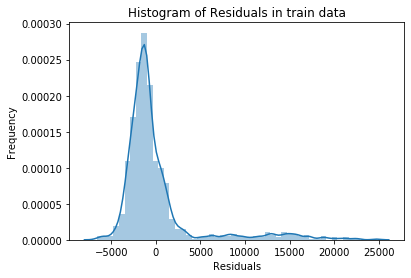

In [129]:
sns.distplot(y_train-y_train_pred)
plt.title("Histogram of Residuals in train data")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

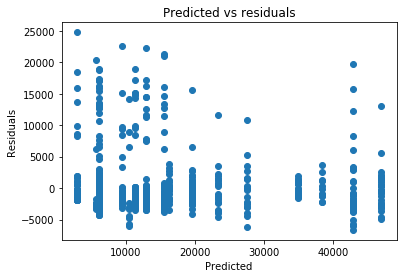

In [131]:
# Checking residuals
plt.scatter(y_train_pred,y_train-y_train_pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

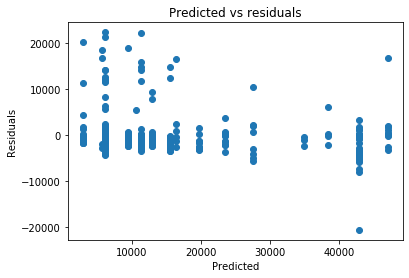

In [132]:
plt.scatter(pred,y_test-pred)
plt.title("Predicted vs residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

Text(0, 0.5, 'Predicted values')

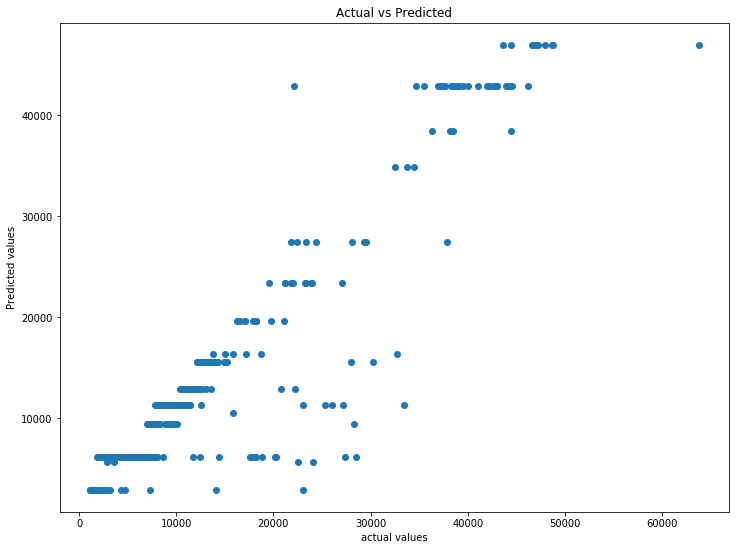

In [138]:
plt.figure(figsize=(12,9))
plt.scatter(y_test,pred)
plt.title("Actual vs Predicted")
plt.xlabel("actual values")
plt.ylabel("Predicted values")

In [156]:
prediction = pipe4.predict(pd.DataFrame(data={'age':[19],'sex':['female'],'bmi':[27.900],'children':[0],'smoker':['yes'],'region':['southwest']}))

In [158]:
prediction

array([19641.93834605])

In [23]:
import pickle
pickleout = open("insurance_predict.pkl",'wb')
pickle.dump(pipe4,pickleout)
pickleout.close()